In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk #importing the Natural Language toolKit

In [2]:
#Setting a style sheet for plots 
plt.style.use('ggplot')

In [3]:
#Reading in the data
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
#Down-sampling the dataset as it is too large 
print (df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [5]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [6]:
#The first review
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

# EDA

In [7]:
#Scores from 1 to 5
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

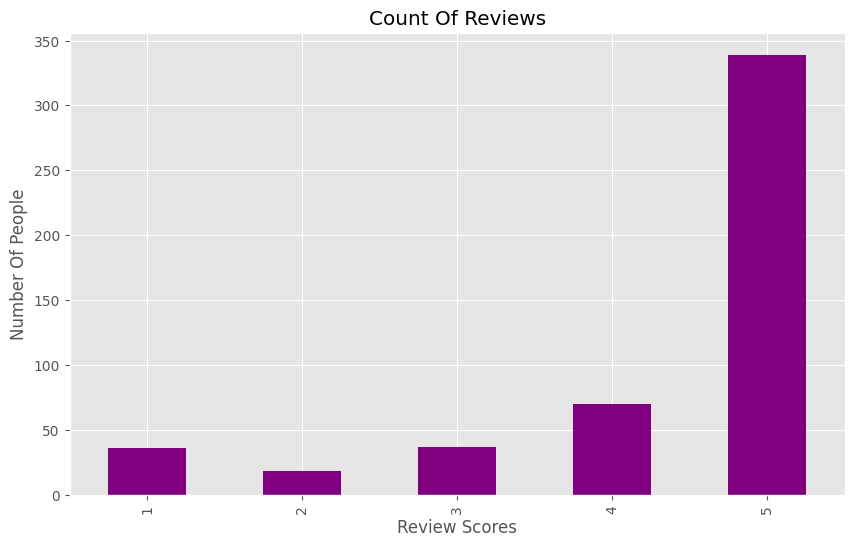

In [8]:
a = df['Score'].value_counts().sort_index().plot(kind='bar', title = 'Count Of Reviews', figsize=(10,6), color='purple')
a.set_xlabel('Review Scores')
a.set_ylabel('Number Of People')
plt.show()
#Biased towards positive reviews by customers

# Basics of NLTk

In [9]:
#Showing off the 20th food review
example = df['Text'][20]
print(example)

My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner.


In [10]:
#Tokenizing - splitting the sentence into words
token = nltk.word_tokenize(example)
token[:6]

['My', 'husband', 'is', 'a', 'Twizzlers', 'addict']

In [11]:
#Finding the parts  of speech (POS)
pos = nltk.pos_tag(token)
pos[:6]

[('My', 'PRP$'),
 ('husband', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Twizzlers', 'NNP'),
 ('addict', 'NN')]

In [12]:
entities =nltk.chunk.ne_chunk(pos)
entities.pprint()

(S
  My/PRP$
  husband/NN
  is/VBZ
  a/DT
  Twizzlers/NNP
  addict/NN
  ./.
  We/PRP
  've/VBP
  bought/VBN
  these/DT
  many/JJ
  times/NNS
  from/IN
  (GPE Amazon/NNP)
  because/IN
  we/PRP
  're/VBP
  government/NN
  employees/NNS
  living/VBG
  overseas/RB
  and/CC
  ca/MD
  n't/RB
  get/VB
  them/PRP
  in/IN
  the/DT
  country/NN
  we/PRP
  are/VBP
  assigned/VBN
  to/TO
  ./.
  They/PRP
  've/VBP
  always/RB
  been/VBN
  fresh/JJ
  and/CC
  tasty/JJ
  ,/,
  packed/VBN
  well/RB
  and/CC
  arrive/JJ
  in/IN
  a/DT
  timely/JJ
  manner/NN
  ./.)


# Using VADER Sentiment Scoring
* Uses a "bag of words" approach
* Stop words are removed (Like the/and/so)
* Has a value of positive, negative or neutral for each of the words 
* Each word is scored and combined to a total score 

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #A progress bar tracker

sa = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**Polarity Scores Samples**

In [14]:
#Sample 1
sa.polarity_scores('I hate the stew!')
#mostly negatove as neg: -0.666

{'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6114}

In [15]:
#Sample 2
sa.polarity_scores('This is the nicest snack ever!')

{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.5411}

**Example:** My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner.

In [16]:
#Example polarityis more on the positive side
sa.polarity_scores(example)


{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6249}

In [17]:
#Running the polarity score on the whole dataset
result = {} #a dictionary to store the polarity scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid]= sa.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
#Result of the 500 reviews whether positive, negative or neutral
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how = 'left') #merging it to the original dataframe

**Merging the (positive, neutral, and negative) values to the original dataframe**

In [19]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **Vader Plotting Results**

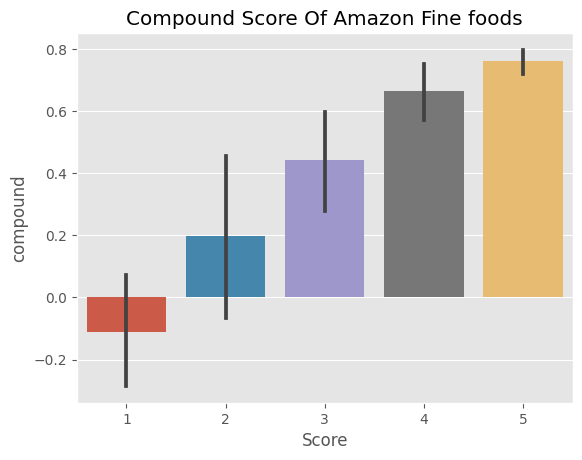

In [20]:
ax = sns.barplot(data=vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score Of Amazon Fine foods')
plt.show()

# Positive Score Vs Neutral Score Vs Negative Score

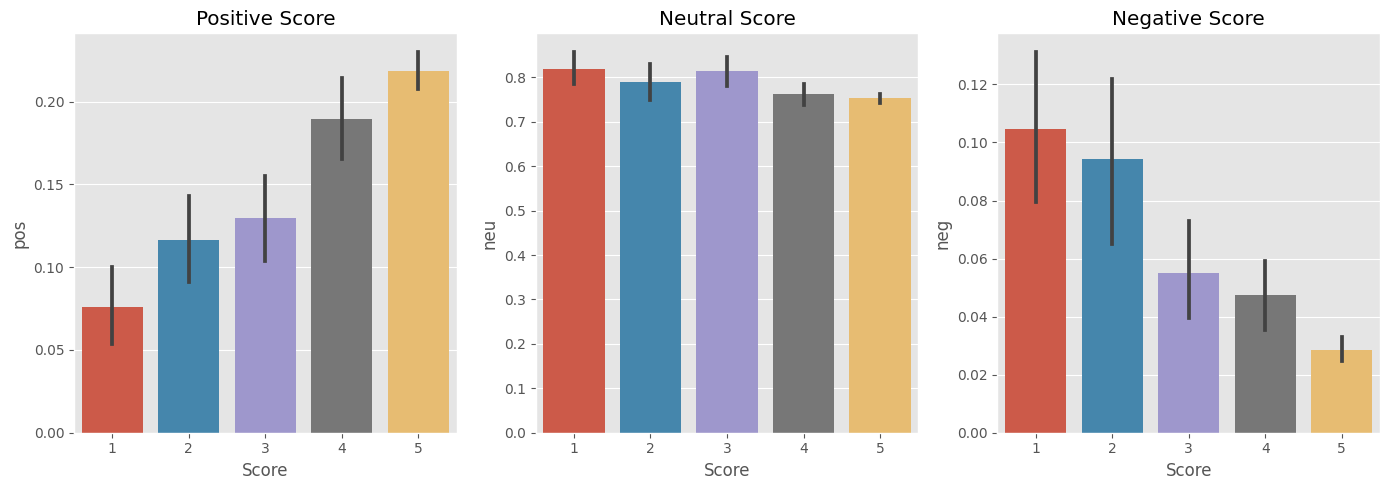

In [21]:
#Breaking down into positive, negative, and neutral results
fig, axs = plt.subplots(1, 3, figsize=(14,5)) #Creating a 1x3 grid for the results
sns.barplot(data=vaders, x= 'Score', y= 'pos', ax=axs[0])
sns.barplot(data=vaders, x= 'Score', y= 'neu', ax= axs[1])
sns.barplot(data=vaders, x= 'Score', y= 'neg', ax=axs[2])
axs[0].set_title('Positive Score')
axs[1].set_title('Neutral Score')
axs[2].set_title('Negative Score')
plt.tight_layout()
plt.show()
